In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('RAINFALL_DATA_ASSAM.csv');
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MARCH,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL FLOOD,FLOODS
0,ASSAM,1901,27.1,19.5,30.6,223.0,207.0,524.9,430.6,464.1,291.4,163.7,115.6,1.2,2498.6,NO
1,ASSAM,1902,9.3,10.2,105.6,350.0,262.1,620.7,510.8,536.0,441.3,97.0,7.8,1.3,2952.1,YES
2,ASSAM,1903,19.9,25.4,103.6,140.6,206.6,607.4,362.7,551.9,306.4,159.5,59.3,1.3,2544.7,YES
3,ASSAM,1904,11.1,56.1,51.9,457.1,375.2,385.7,477.6,438.8,245.9,115.9,46.4,2.5,2664.1,YES
4,ASSAM,1905,19.9,16.9,137.9,213.0,275.5,521.7,439.1,649.1,276.0,200.0,16.8,24.8,2790.6,YES


In [ ]:
data.apply(lambda x:sum(x.isnull()), axis=0)

SUBDIVISION     0
YEAR            0
JAN             0
FEB             0
MARCH           0
APR             0
MAY             0
JUN             0
JUL             0
AUG             0
SEP             0
OCT             0
NOV             0
DEC             0
ANNUAL FLOOD    0
FLOODS          0
dtype: int64

In [ ]:
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [ ]:
x = data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MARCH,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,27.1,19.5,30.6,223.0,207.0,524.9,430.6,464.1,291.4,163.7,115.6,1.2
1,1902,9.3,10.2,105.6,350.0,262.1,620.7,510.8,536.0,441.3,97.0,7.8,1.3
2,1903,19.9,25.4,103.6,140.6,206.6,607.4,362.7,551.9,306.4,159.5,59.3,1.3
3,1904,11.1,56.1,51.9,457.1,375.2,385.7,477.6,438.8,245.9,115.9,46.4,2.5
4,1905,19.9,16.9,137.9,213.0,275.5,521.7,439.1,649.1,276.0,200.0,16.8,24.8


In [ ]:
y = data.iloc[:, -1]
y.head()

0    0
1    1
2    1
3    1
4    1
Name: FLOODS, dtype: int64

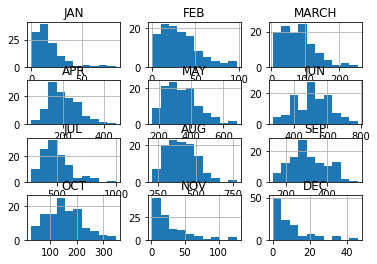

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['JAN','FEB','MARCH','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']]
c.hist()
plt.show()

In [ ]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.3221957 , 0.19709544, ..., 0.42614708, 0.91024623,
        0.02631579],
       [0.00877193, 0.1097852 , 0.10062241, ..., 0.21653048, 0.05401112,
        0.02850877],
       [0.01754386, 0.23627685, 0.25829876, ..., 0.41294783, 0.46306593,
        0.02850877],
       ...,
       [0.98245614, 0.01193317, 0.09439834, ..., 0.30861094, 0.        ,
        0.04385965],
       [0.99122807, 0.02267303, 0.28838174, ..., 0.02168448, 0.01588562,
        0.00877193],
       [1.        , 0.15871122, 0.15560166, ..., 0.10842238, 0.10325655,
        0.33333333]])

In [ ]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.head()

,YEAR,JAN,FEB,MARCH,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
16,1917,12.8,91.6,38.7,168.8,206.2,584.7,472.8,346.3,313.7,236.6,46.4,1.4
0,1901,27.1,19.5,30.6,223.0,207.0,524.9,430.6,464.1,291.4,163.7,115.6,1.2
20,1921,35.1,20.3,134.1,324.6,414.8,604.9,542.2,429.4,333.2,142.1,8.5,10.3
108,2009,7.9,11.6,44.9,134.9,246.5,321.1,426.3,533.8,192.3,135.9,9.0,4.0
88,1989,10.5,51.6,30.4,183.4,260.1,488.8,747.0,267.9,425.8,194.1,16.2,6.5


In [ ]:
y_train.head()

16     1
0      0
20     1
108    0
88     1
Name: FLOODS, dtype: int64

LOGISTIC REGRESSION

In [ ]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_clf = lr.fit(x_train_std,y_train)



In [ ]:
y_predict = lr_clf.predict(x_test_std)
print('Predicted chances of flood')
print(y_predict)

Predicted chances of flood
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1]


In [ ]:
print('Actual chances of flood')
print(y_test.values)

Actual chances of flood
[1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score: %f"%(accuracy_score(y_test,y_predict)*100))
print("recall score: %f"%(recall_score(y_test,y_predict)*100))



accuracy score: 95.652174
recall score: 100.000000
